# Atividade Prática 1

Nessa atividade iremos dar os primeiros passos 
para a tarefa de clustering (aprendizado não-supervisionado)
é esperado que ao término dessa prática se tenha as seguintes habilidades:

* Análise exploratória a partir de uma gráfico de dispersão;
* Execução do algoritmo k-means através da lib sklearn;
* Análise dos clusters gerados

## passo 1: import das libs necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

## passo 2: carregar o dataset

Obs: iremos considerar X sendo nosso dataset e y_true o que seriam as classes dos dados

In [ ]:
X, y_true = make_blobs(
    n_samples=100, n_features=2, centers=4, cluster_std=0.4, random_state=0
)

# os dados foram carregados em um formato matricial numpy, 
# porém para facilitar as análises precisaremos converter para um
# tipo pandas DataFrame
X = pd.DataFrame(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## passo 3: análise exploratória do dataset

dimensões do dataset (exemplos, features):  (100, 2)

dispersão dos dados:


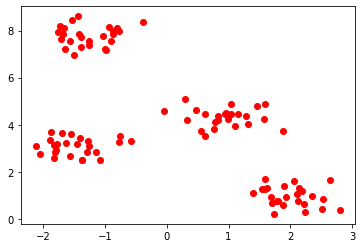

In [ ]:
print("dimensões do dataset (exemplos, features): ", X.shape)

print("\ndispersão dos dados:")

plt.scatter(x=X[0], y=X[1], c='red')
# [ALTERE AQUI] plote o gráfico de dispersão colocando no eixo X a feature 0 e no eixo Y a feature 1
plt.show()

## passo 4: execução do k-means

In [ ]:
%%time
# [ALTERE AQUI] Execute o k-means passando o número de clusters igual a 4 e salve na variável model
model = KMeans(n_clusters=4, random_state=0).fit(X)

y_predict = model.labels_


CPU times: user 288 ms, sys: 0 ns, total: 288 ms
Wall time: 295 ms


In [ ]:
y_predict

array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.48886624,  3.07731162],
       [-1.26414502,  7.77811813],
       [ 2.00454873,  0.9520213 ],
       [ 0.93588159,  4.3205638 ]])

## passo 5: avaliação do k-means

Silhueta:  0.7697826124517921
NMI:  1.0


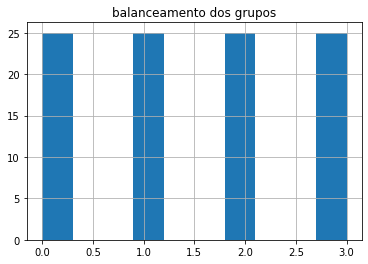

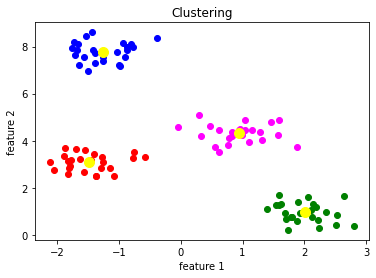

In [ ]:
sil = metrics.silhouette_score(X, y_predict, metric='euclidean')
nmi = metrics.adjusted_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()


# plot de como ficou a clusterização
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 1 e atribua a cor vermelha
x_scatter = X.iloc[y_predict==0, 0]
y_scatter = X.iloc[y_predict==0, 1]
plt.scatter(x=x_scatter, y=y_scatter, c='red')
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 2 e atribua a cor azul
x_scatter = X.iloc[y_predict==1, 0]
y_scatter = X.iloc[y_predict==1, 1]
plt.scatter(x=x_scatter, y=y_scatter, c='blue')
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 3 e atribua a cor verde
x_scatter = X.iloc[y_predict==2, 0]
y_scatter = X.iloc[y_predict==2, 1]
plt.scatter(x=x_scatter, y=y_scatter, c='green')
# [ALTERE AQUI] plote o gráfico de dispersão para o cluster 4 e atribua a cor magenta
x_scatter = X.iloc[y_predict==3, 0]
y_scatter = X.iloc[y_predict==3, 1]
plt.scatter(x=x_scatter, y=y_scatter, c='magenta')

# [ALTERE AQUI] plote o gráfico de dispersão para os centróides e atribua a cor amarela
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow',label = 'Centroids')

plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()